In [15]:
import pandas as pd
import zipfile
import os

# Read the CSV file
input_file = "combined_results.csv"
df = pd.read_csv(input_file)

# Display original columns to verify
print("Original columns:", df.columns.tolist())
print("Original shape:", df.shape)
print("\nFirst few rows of original data:")
print(df.head())

# Select only the required columns. We will name them later.
df_filtered = df[['Sentence ID', 'Prediction']].copy()

# Display the processed data
print("\n" + "="*50)
print("PROCESSED DATA (before header):")
print("="*50)
print("Shape:", df_filtered.shape)
print("\nFirst few rows of processed data:")
print(df_filtered.head())

# --- Manual CSV Creation to match exact format ---

# 1. Define the exact header string required by the competition
header = "Document ID,Prediction\n"
output_file = "prediction"  # NO extension as per competition rules

# 2. Save the DataFrame to a string WITHOUT the header
data_string = df_filtered.to_csv(index=False, header=False)

# 3. Write the exact header and the data string to the file
with open(output_file, 'w', encoding='utf-8') as f:
    f.write(header)
    f.write(data_string)

print(f"\n✅ SUCCESS!")
print(f"📁 File saved as: {output_file} (no extension as required)")
print(f"📊 Total records: {len(df_filtered):,}")
print(f"📋 Header written: {header.strip()}")

# Create the zip file as required by competition rules
zip_filename = "prediction.zip"
with zipfile.ZipFile(zip_filename, 'w', zipfile.ZIP_DEFLATED) as zipf:
    zipf.write(output_file, output_file)

print(f"\n🎯 COMPETITION SUBMISSION READY!")
print(f"📦 Zip file created: {zip_filename}")
print(f"📄 Contains file: {output_file} (no extension)")

# Verify the zip file contents
print("\n" + "="*50)
print("ZIP FILE VERIFICATION:")
print("="*50)
with zipfile.ZipFile(zip_filename, 'r') as zipf:
    files_in_zip = zipf.namelist()
    print(f"Files in {zip_filename}: {files_in_zip}")
    
    # Read the file from zip to verify format
    with zipf.open(output_file) as f:
        content = f.read().decode('utf-8')
        lines = content.strip().split('\n')
        print(f"📋 Header: {lines[0]}")
        print(f"📊 Total lines: {len(lines)} (including header)")
        print("🔍 First 5 data lines:")
        for i, line in enumerate(lines[1:6], 1):
            print(f"   {i}: {line}")

# Final verification - read the actual file to ensure format is correct
print("\n" + "="*50)
print("FINAL FILE VERIFICATION (reading with pandas):")
print("="*50)
# When reading back, pandas will correctly interpret the header
verification_df = pd.read_csv(output_file)
print("File columns:", verification_df.columns.tolist())
print("File shape:", verification_df.shape)
print("\nFirst 10 rows:")
print(verification_df.head(10))

print(f"\n🚀 READY FOR SUBMISSION!")
print(f"✅ Upload the file: {zip_filename}")
print(f"✅ File format: CSV with no extension, comma-separated.")
print(f"✅ Zip format: prediction.zip containing 'prediction' file.")
print(f"✅ Header: 'Sentence ID,Prediction' (no quotes).")
print(f"✅ Format: ID,PredictedLevel (e.g., 1234,19).")


Original columns: ['Sentence ID', 'Prediction']
Original shape: (100, 2)

First few rows of original data:
   Sentence ID  Prediction
0      1010295          14
1      1010296          14
2      1010297          13
3      1010298          15
4      1010299          13

PROCESSED DATA (before header):
Shape: (100, 2)

First few rows of processed data:
   Sentence ID  Prediction
0      1010295          14
1      1010296          14
2      1010297          13
3      1010298          15
4      1010299          13

✅ SUCCESS!
📁 File saved as: prediction (no extension as required)
📊 Total records: 100
📋 Header written: Document ID,Prediction

🎯 COMPETITION SUBMISSION READY!
📦 Zip file created: prediction.zip
📄 Contains file: prediction (no extension)

ZIP FILE VERIFICATION:
Files in prediction.zip: ['prediction']
📋 Header: Document ID,Prediction
📊 Total lines: 101 (including header)
🔍 First 5 data lines:
   1: 1010295,14
   2: 1010296,14
   3: 1010297,13
   4: 1010298,15
   5: 1010299,13

FI

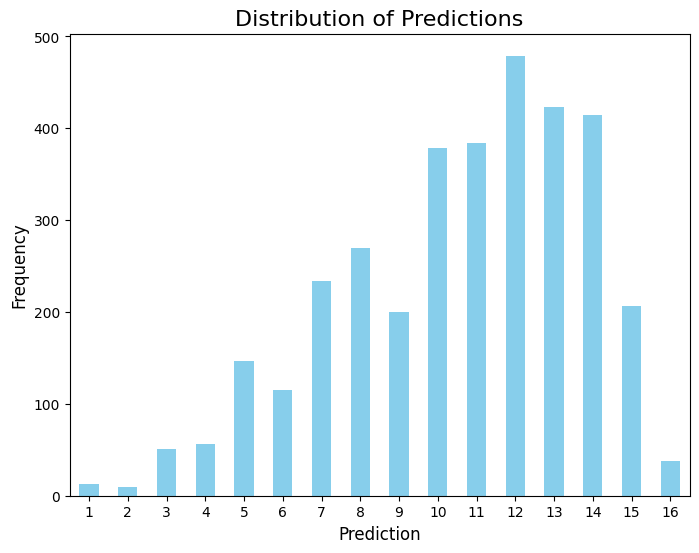

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a pandas DataFrame
df = pd.read_csv('87.5_prediction.csv')

# Plot the distribution of 'Prediction' values
plt.figure(figsize=(8, 6))
df['Prediction'].value_counts().sort_index().plot(kind='bar', color='skyblue')

# Add labels and title
plt.title('Distribution of Predictions', fontsize=16)
plt.xlabel('Prediction', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Show the plot
plt.xticks(rotation=0)
plt.show()
